In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
data = pd.read_pickle("agar_pad_with_deconv.pickle")
data["Distance from centre of colony"] = np.sqrt(
    (data["Cell y"] - data["Colony centroid y"])**2 + (data["Cell x"] - data["Colony centroid x"])**2 
)
data["Normalised distance from centre of colony"] = data["Distance from centre of colony"] / (data["Colony diameter"]/2)
data["Mean true intensity"] = data["True intensity"] / data["Area"]
data["Mean deconvolved intensity"] = data["Deconvolved intensity"] / data["Area"]

data = data[(data["Mean true intensity"] > 0)]


In [16]:
np.mean(data["Deconvolved intensity"] / data["True intensity"])

1.0568240390344217

In [17]:
data = data.dropna()

(500.0, 4000.0)

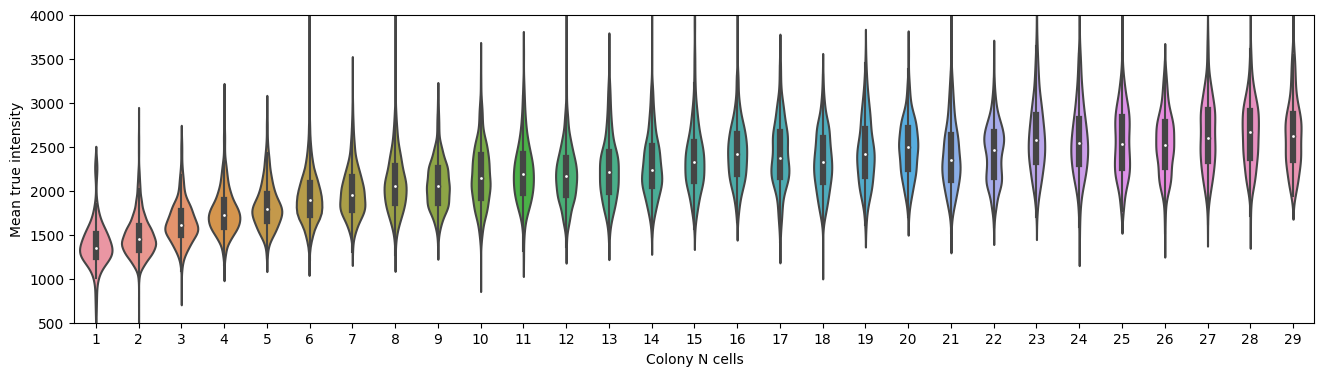

In [18]:
plt.figure(figsize=(16,4))
sns.violinplot(data = data.query("`Colony N cells` < 30"), y = "Mean true intensity", x = "Colony N cells")
plt.ylim(500,4000)

In [19]:
data

,Label,True intensity,Observed intensity,Deconvolved intensity,Colony circularity,Cell y,Cell x,Colony diameter,Colony centroid y,Colony centroid x,N neighbours,Colony N cells,Area,Distance from centre of colony,Normalised distance from centre of colony,Mean true intensity,Mean deconvolved intensity
0,31,2326602.0,2326602.0,2.600379e+06,1.466081,78.141431,838.917637,125.801431,100.666731,818.377565,2,4,1202.0,30.484155,0.484639,1935.608985,2163.376596
1,33,3029899.0,3029899.0,3.324644e+06,1.466081,100.546070,847.968157,125.801431,100.666731,818.377565,3,4,1476.0,29.590838,0.470437,2052.777100,2252.468976
2,34,2322460.0,2322460.0,2.615749e+06,1.466081,97.972270,791.395147,125.801431,100.666731,818.377565,3,4,1154.0,27.116618,0.431102,2012.530329,2266.680372
3,36,2862660.0,2862660.0,3.189782e+06,1.466081,122.621114,791.459870,125.801431,100.666731,818.377565,2,4,1383.0,34.735533,0.552228,2069.891540,2306.422366
0,37,4291237.0,4291237.0,4.743246e+06,1.268023,348.116413,248.039853,268.078347,435.804677,206.343626,4,25,1907.0,97.096894,0.724392,2250.255375,2487.281647
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3,125,1823073.0,1823073.0,2.066156e+06,1.794684,2045.198817,90.092387,164.915130,2021.828631,138.080135,2,4,1353.0,53.375927,0.647314,1347.430155,1527.092490
0,121,2237948.0,2237948.0,2.598328e+06,1.481906,2008.804242,1357.450303,108.046286,2016.638712,1375.223533,1,2,1650.0,19.423352,0.359538,1356.332121,1574.744155
1,124,1976389.0,1976389.0,2.265917e+06,1.481906,2025.337820,1394.958277,108.046286,2016.638712,1375.223533,1,2,1486.0,21.566979,0.399217,1330.006057,1524.843167
0,126,1867096.0,1867096.0,2.167798e+06,1.615190,2210.194672,1227.920765,110.113578,2222.468695,1208.242306,1,2,1464.0,23.192528,0.421247,1275.338798,1480.736105


In [20]:
data.groupby("Colony N cells", as_index=False).var()

,Colony N cells,Label,True intensity,Observed intensity,Deconvolved intensity,Colony circularity,Cell y,Cell x,Colony diameter,Colony centroid y,Colony centroid x,N neighbours,Area,Distance from centre of colony,Normalised distance from centre of colony,Mean true intensity,Mean deconvolved intensity
0,1,16414.170561,1.055712e+12,1.055712e+12,1.430267e+12,0.063824,391378.732056,376071.491736,581.740683,391378.732056,376071.491736,0.000000,398543.703963,0.000000,0.000000,6.852061e+04,8.830320e+04
1,2,13815.091305,4.591280e+11,4.591280e+11,5.612440e+11,0.068976,373201.816897,367210.510224,328.325470,372715.858078,367060.560808,0.000000,91394.864260,40.664156,0.005285,5.593309e+04,7.017880e+04
2,3,9043.739703,9.578651e+11,9.578651e+11,1.182743e+12,0.056162,349824.701122,326636.521826,577.887656,349090.060904,326400.367805,0.088314,253425.100510,147.792994,0.025396,5.769783e+04,6.909403e+04
3,4,17570.941479,4.808912e+11,4.808912e+11,5.842272e+11,0.032448,344372.535256,340492.565019,464.199147,343570.060122,340114.908106,0.282645,104646.848202,84.199971,0.011644,6.834649e+04,8.662369e+04
4,5,17676.309558,7.528355e+11,7.528355e+11,8.881173e+11,0.036745,349527.338585,394168.357464,562.360626,347911.675166,393861.184122,0.557564,177274.584939,200.146355,0.026830,7.170214e+04,8.416105e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,361,14581.308865,2.609406e+12,2.609406e+12,2.737488e+12,0.000000,52599.910746,22314.370875,0.000000,0.000000,0.000000,1.414233,161890.841335,10554.489368,0.044481,3.477839e+05,3.647400e+05
105,390,31882.208160,2.037976e+12,2.037976e+12,2.063999e+12,0.000000,43735.442740,41583.697154,0.000000,0.000000,0.000000,1.427566,81472.806776,10412.170312,0.040039,3.789562e+05,3.795246e+05
106,407,19380.681604,3.715095e+12,3.715095e+12,3.800499e+12,0.000000,65625.455146,51534.391181,0.000000,0.000000,0.000000,1.640052,170802.070601,22241.486680,0.058293,4.370532e+05,4.733441e+05
107,636,33649.904367,6.221800e+12,6.221800e+12,6.366756e+12,0.000000,60946.430395,49730.655856,0.000000,0.000000,0.000000,1.711864,207361.892327,15104.336395,0.053018,1.121612e+06,1.184676e+06


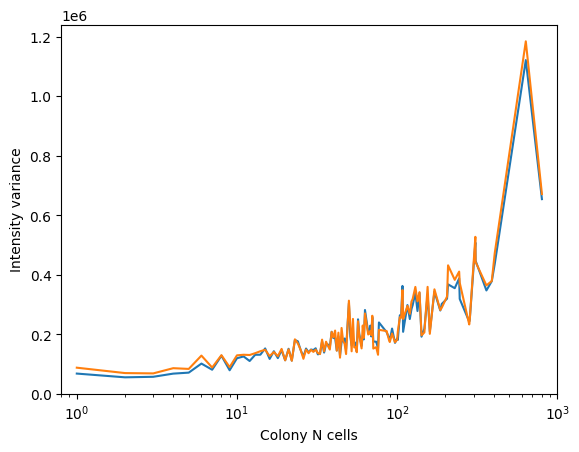

In [21]:
sns.lineplot(data = data.groupby("Colony N cells", as_index=False).var(), x = "Colony N cells", y = "Mean true intensity")
sns.lineplot(data = data.groupby("Colony N cells", as_index=False).var(), x = "Colony N cells", y = "Mean deconvolved intensity")

plt.ylabel("Intensity variance")
plt.xlim(0.8,1000)
#plt.ylim(0,0.5*10**6)
plt.xscale("log")

In [22]:
data["Mean true intensity"]

0    1935.608985
1    2052.777100
2    2012.530329
3    2069.891540
0    2250.255375
        ...     
3    1347.430155
0    1356.332121
1    1330.006057
0    1275.338798
1    1295.479824
Name: Mean true intensity, Length: 31597, dtype: float64

<AxesSubplot:xlabel='Colony N cells', ylabel='Mean true intensity'>

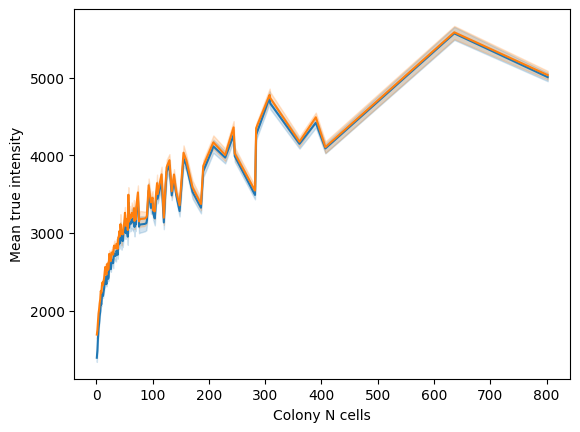

In [23]:
sns.lineplot(data=data, x = "Colony N cells", y = "Mean true intensity")

#plt.xscale("log")

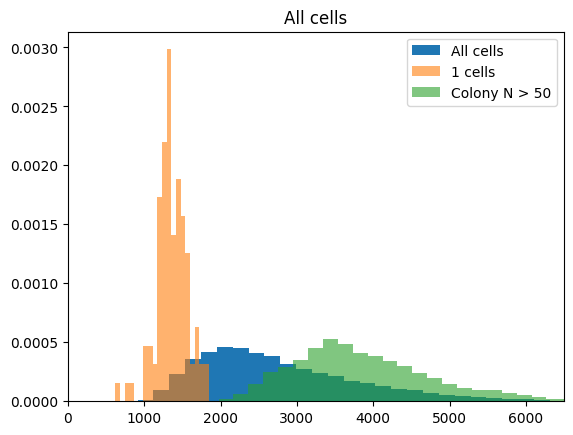

In [31]:
plt.hist(data["Mean true intensity"],bins=40, density=True)
plt.hist(data.query("`Colony N cells` == 1 & `Mean true intensity` < 2000")["Mean true intensity"],bins=20, density=True, alpha=0.6)

plt.hist(data.query(" `Colony N cells` > 50")["Mean true intensity"],bins=40, density=True, alpha=0.6)
#plt.hist(data.query("100 > `Colony N cells` > 100")["Mean true intensity"],bins=40, density=True, alpha=0.6)

plt.legend(["All cells", "1 cells",  "Colony N > 50"])
plt.title("All cells")
plt.xlim(0,6500)
plt.show()

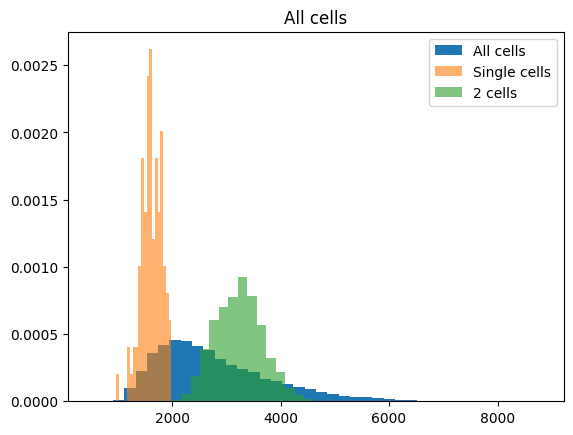

In [25]:
plt.hist(data["Mean true intensity"],bins=40, density=True)
plt.hist(data.query("`Colony N cells` == 1 & `Mean deconvolved intensity` < 2000")["Mean deconvolved intensity"],bins=20, density=True, alpha=0.6)

plt.hist(data.query("100 > `Colony N cells` > 50")["Mean deconvolved intensity"],bins=40, density=True, alpha=0.6)
#plt.hist(data.query("100 > `Colony N cells` > 100")["Mean true intensity"],bins=40, density=True, alpha=0.6)

plt.legend(["All cells", "Single cells", "2 cells",  "Colony N > 50"])
plt.title("All cells")
plt.show()

In [26]:
data.query("`Colony N cells` == 1")["Mean true intensity"].std() / data.query("`Colony N cells` == 1")["Mean true intensity"].mean()

0.1880074063700696

In [14]:
data.query("`Colony N cells` > 50")["Mean true intensity"].std() / data.query("`Colony N cells` > 50")["Mean true intensity"].mean()

0.24089401869783358